<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/EDA/03-analisis-univariante-causal-multivariante/03_B___Analisis_multivariante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 INTRO: Análisis Multivariante
Explicación de cómo realizar análisis multivariantes.

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1WNWGnLUyiGqwFf92V3V_szu3QTD_0EQY5GZjhFgen5Q/edit?usp=sharing)
*   [Enlace a este notebook en Colab](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/03-analisis-univariante-causal-multivariante/03_B___Analisis_multivariante.ipynb)



## 0101 Qué es un análisis multivariante?
Los análisis multivariante estudian la relación entre dos o más variables. En primer lugar, nos centraremos en estudiar la relación entre dos variables (análisis bivariante).

Cómo analizamos la relación entre una variable (A) y otra de interés (Y)?

Explicaremos cómo hacerlo para distintas combinaciones:

*   A categórica, Y numérica
*   A e Y numéricas

## 0102 Import
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)): pandas, numpy, seaborn, matplotlib.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0103 Carga el dataset Fifa19
Para probar a hacer análisis bivariante utilizaremos el dataframe limpio con datos del fifa 19 ([aquí](https://drive.google.com/file/d/1P0sQHp1bPiKbL-MSr7FndJRgowvOLdjU/view?usp=sharing) está mi archivo ya limpio). Importa este dataset en un dataframe llamado **df_fifa19**.


Utiliza solo las columnas cols = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Height_cm', 'Weight_kg', 'Value_€', 'Wage_€', 'Release Clause_€', 'Preferred Foot', 'Position', 'SprintSpeed'] y en este orden.

In [ ]:
cols = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 
        'Height_cm', 'Weight_kg', 'Value_€', 'Wage_€', 
        'Release Clause_€', 'Preferred Foot', 'Position', 'SprintSpeed']

# Url
url = "https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Fifa19_Clean.csv"

# Importamos el archivos usando read_csv()
df_fifa19 = pd.read_csv(url, usecols=cols)
df_fifa19.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Position,SprintSpeed,Weight_kg,Value_€,Wage_€,Release Clause_€,Height_cm
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,RF,86.0,72.121128,110500000.0,565000.0,226500000.0,170.18
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,ST,91.0,83.007336,77000000.0,405000.0,127100000.0,187.96
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,LW,90.0,68.038800,118500000.0,290000.0,228100000.0,175.26


## 0104 Carga dataset Titanic
Os he dejado el dataset del Titanic también en mi Github. Este es el enlace raw https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/titanic.csv.

Cárgalo como df_titanic.

In [ ]:
# url
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/titanic.csv'

# Cargamos en un dataframe
df_titanic = pd.read_csv(url)
df_titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 02 A categórica, Y numérica
Veamos cómo estudiar la relación entre dos variables cuando A es categórica e Y numérica.

La idea es que la variable Y tiene una distribución, cambia esa distribución si ajustamos a distintas categorías de A?

### 0201 A = 'Preferred Foot' | Y = 'Overall'

In [ ]:
sns.set()

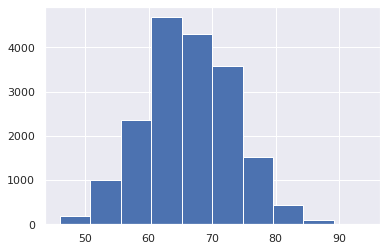

In [ ]:
# Distribución de variable 'Overall'
plt.hist(df_fifa19['Overall'])
plt.show()

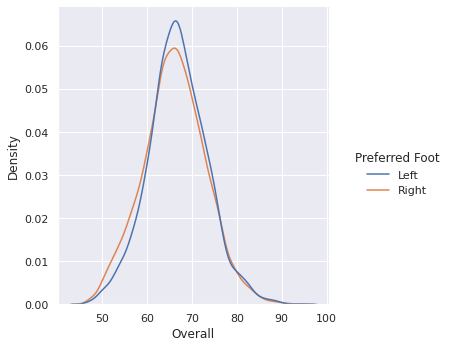

In [ ]:
# Seaborn tiene una función tremendamente útil para ver la distribución de una
# variable ("overall") en función de otra categórica ('Preferred Foot')
sns.displot(df_fifa19, 
            x="Overall", 
            hue='Preferred Foot', 
            kind="kde", 
            common_norm=False)
plt.show()

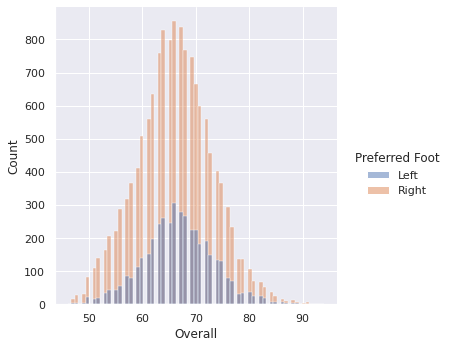

In [ ]:
# Seaborn tiene una función tremendamente útil para ver la distribución de una
# variable ("overall") en función de otra categórica ('Preferred Foot')
sns.displot(df_fifa19, 
            x="Overall", 
            hue='Preferred Foot', 
            kind="hist", 
            common_norm=False)
plt.show()

In [ ]:
# Groupby
df_fifa19.groupby('Preferred Foot')['Overall'].mean()

Preferred Foot
Left     66.801472
Right    66.083381
Name: Overall, dtype: float64

In [ ]:
# Groupby
df_fifa19.groupby('Preferred Foot')['Overall'].agg(['mean', 'median', 'max', 'mean', 'count']).reset_index()

,Preferred Foot,mean,median,max,mean,count
0,Left,66.801472,67,94,66.801472,4211
1,Right,66.083381,66,94,66.083381,13948


## 0202 EJEMPLO A = 'Nationality' | Y = 'Overall

In [ ]:
# La Variable Nacionalidad tiene muchas categorías
df_fifa19['Nationality'].value_counts()

England          1657
Germany          1195
Spain            1071
Argentina         936
France            911
                 ... 
Lebanon             1
Oman                1
Qatar               1
New Caledonia       1
Liberia             1
Name: Nationality, Length: 164, dtype: int64

In [ ]:
# Cuantas categorías distintas?
df_fifa19['Nationality'].nunique()

164

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

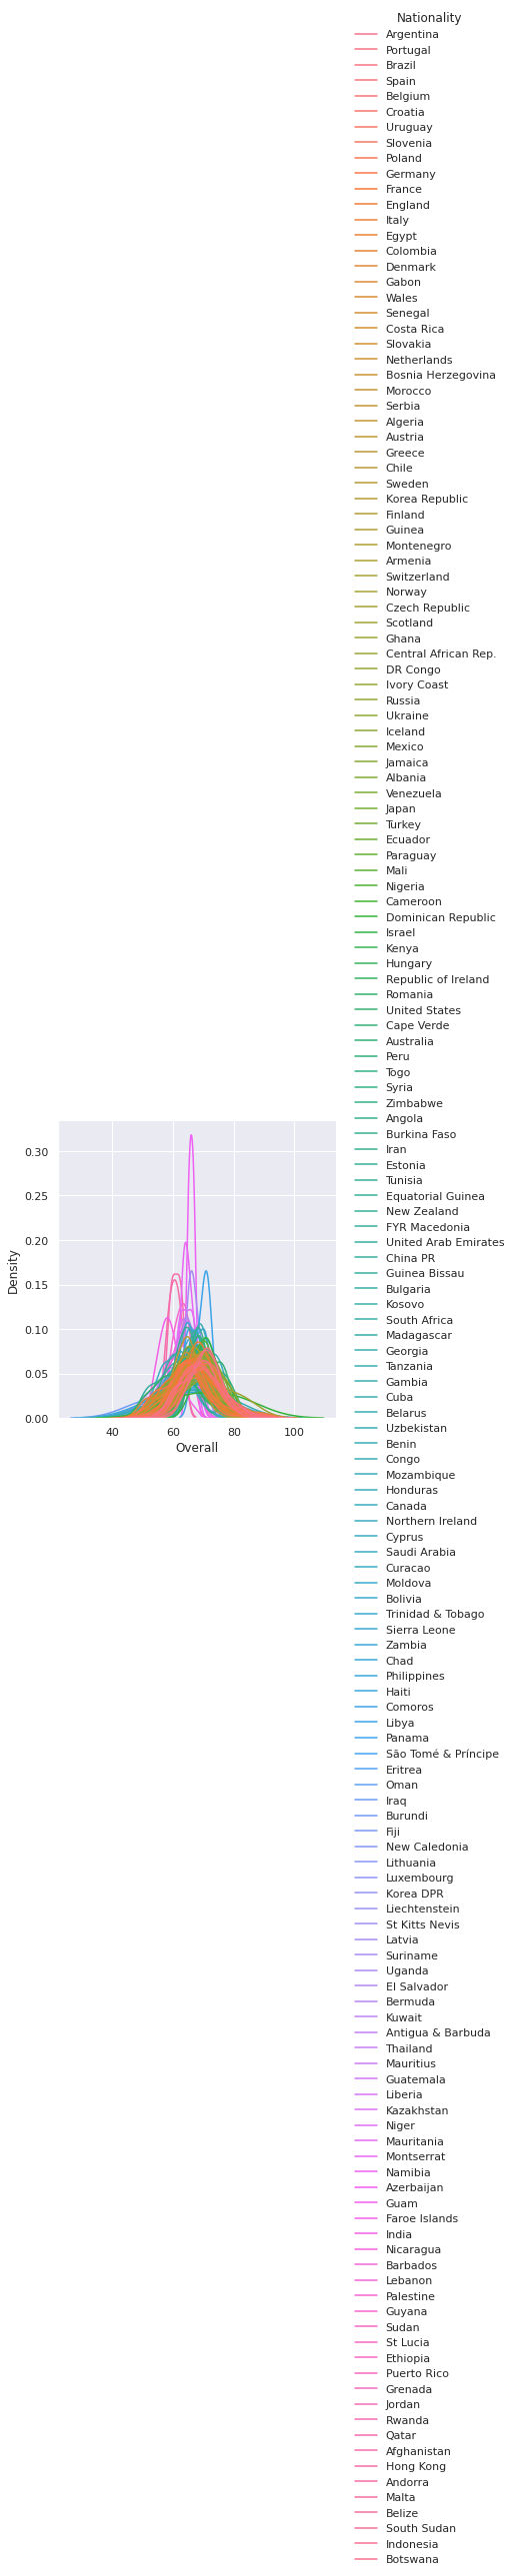

In [ ]:
# Qué pasa si utilizamos el displot de seaborn? 
sns.displot(df_fifa19, x="Overall", hue='Nationality', kind="kde", common_norm=False)
plt.show()

In [ ]:
# Columna dummy España - Resto
filtro_españa = df_fifa19['Nationality'] == 'Spain'
df_fifa19['España'] = filtro_españa.astype(int)
df_fifa19.head()

,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Position,SprintSpeed,Weight_kg,Value_€,Wage_€,Release Clause_€,Height_cm,España
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,RF,86.0,72.121128,110500000.0,565000.0,226500000.0,170.18,0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,ST,91.0,83.007336,77000000.0,405000.0,127100000.0,187.96,0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,LW,90.0,68.038800,118500000.0,290000.0,228100000.0,175.26,0
3,De Gea,27,Spain,91,93,Manchester United,Right,GK,58.0,76.203456,72000000.0,260000.0,138600000.0,193.04,1
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,RCM,76.0,69.853168,102000000.0,355000.0,196400000.0,180.34,0


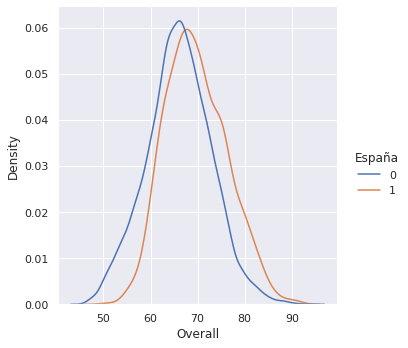

In [ ]:
# Qué pasa si utilizamos el displot de seaborn? 
sns.displot(df_fifa19, x="Overall", hue='España', kind="kde", common_norm=False)
plt.show()

In [ ]:
# Groupby
df_fifa19.groupby('España')['Overall'].mean()

España
0    66.033298
1    69.705882
Name: Overall, dtype: float64

In [ ]:
# Groupby
df_fifa19.groupby('Nationality')['Overall'].mean()

Nationality
Afghanistan    61.000000
Albania        66.025641
Algeria        70.633333
Andorra        62.000000
Angola         67.600000
                 ...    
Uzbekistan     67.500000
Venezuela      67.348485
Wales          64.139535
Zambia         65.222222
Zimbabwe       69.769231
Name: Overall, Length: 164, dtype: float64

In [ ]:
# Groupby
df_fifa19.groupby('Nationality')['Overall'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
Nationality,,,,,
Afghanistan,4,61.000000,61.0,63,59
Albania,39,66.025641,67.0,81,52
Algeria,60,70.633333,70.5,85,58
Andorra,1,62.000000,62.0,62,62
Angola,15,67.600000,67.0,78,60
...,...,...,...,...,...
Uzbekistan,2,67.500000,67.5,75,60
Venezuela,66,67.348485,68.0,81,53
Wales,129,64.139535,64.0,88,47


In [ ]:
# Groupby
nivel_paises = df_fifa19.groupby('Nationality')['Overall'].agg(['count','mean','median','max','min']).reset_index()
nivel_paises

,Nationality,count,mean,median,max,min
0,Afghanistan,4,61.000000,61.0,63,59
1,Albania,39,66.025641,67.0,81,52
2,Algeria,60,70.633333,70.5,85,58
3,Andorra,1,62.000000,62.0,62,62
4,Angola,15,67.600000,67.0,78,60
...,...,...,...,...,...,...
159,Uzbekistan,2,67.500000,67.5,75,60
160,Venezuela,66,67.348485,68.0,81,53
161,Wales,129,64.139535,64.0,88,47
162,Zambia,9,65.222222,66.0,73,56


In [ ]:
# Groupby
filtro = nivel_paises['count'] > 25
nivel_paises = nivel_paises[filtro].sort_values('median', ascending=False)
nivel_paises

,Nationality,count,mean,median,max,min
128,Russia,79,70.063291,71.0,82,57
123,Portugal,322,71.344720,71.0,94,57
155,Ukraine,73,70.424658,71.0,82,52
20,Brazil,825,71.273939,71.0,92,48
2,Algeria,60,70.633333,70.5,85,58
...,...,...,...,...,...,...
110,New Zealand,44,62.613636,62.0,77,52
130,Saudi Arabia,337,60.756677,61.0,74,50
126,Republic of Ireland,368,60.885870,61.0,80,47
30,China PR,390,59.900000,60.0,76,47


In [ ]:
# y España?
nivel_paises = nivel_paises.reset_index(drop=True)
nivel_paises.loc[nivel_paises['Nationality']=='Spain',:]

,Nationality,count,mean,median,max,min
22,Spain,1071,69.705882,69.0,91,51


## 0203 EJERCICIO
En el dataset del titanic, estudia la relación entre sexo y precio del billete ('Fare'), y entre el sexo y la edad?

En ambos casos:


*   Muestra la variación de la distribución con sns.distplot()
*   Utiliza un groupby para comprobar la variación de los principales estadísticos (media, mediana, min, max)



### 020301 A = 'Sexo' | Y = 'Fare'

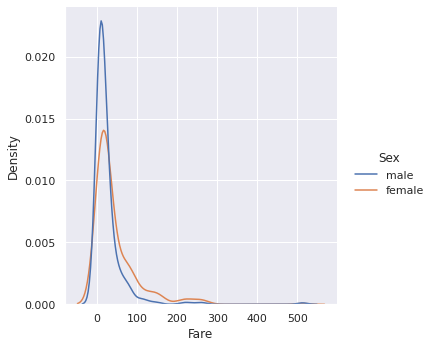

In [ ]:
# Displot de seaborn
sns.displot(df_titanic, x="Fare", hue='Sex', kind="kde", common_norm=False)
plt.show()

In [ ]:
# groupby
df_titanic.groupby('Sex')['Fare'].agg(['mean', 'median', 'min', 'max']).reset_index()

,Sex,mean,median,min,max
0,female,44.479818,23.0,6.75,512.3292
1,male,25.523893,10.5,0.00,512.3292


### 020302 A = 'Sexo' | Y = 'Age'

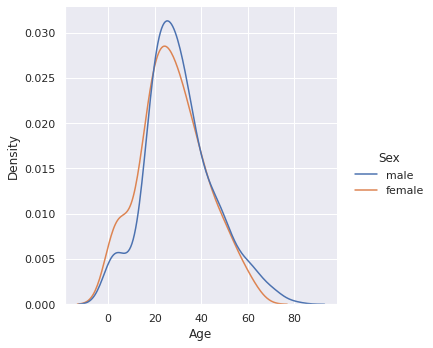

In [ ]:
# Displot de seaborn
sns.displot(df_titanic, x="Age", hue='Sex', kind="kde", common_norm=False)
plt.show()

In [ ]:
# groupby
df_titanic.groupby('Sex')['Age'].agg(['mean', 'median', 'min', 'max']).reset_index()

,Sex,mean,median,min,max
0,female,27.915709,27.0,0.75,63.0
1,male,30.726645,29.0,0.42,80.0


# 03 A numérica, Y numérica
Las principales herramientas para evaluar la relación entre dos variables son:

*   Estudio del diagrama de dispersión
*   Cálculo del coeficiente de correlación




## 0301 Diagrama de dispersión
La función plt.[scatter()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html) nos permite realizar diagramas de dispersión.

La función sns.[pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html) genera una matriz con un diagrama de dispersión por cada par de variables.

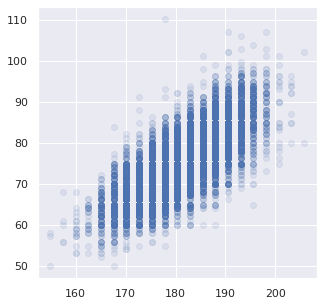

In [ ]:
# plt.scatter()
plt.figure(figsize=(5,5))
plt.scatter(x = df_fifa19['Height_cm'], 
            y = df_fifa19['Weight_kg'], 
            alpha=0.1)
plt.show()

In [ ]:
# sns.pairplot()
sns.pairplot(df_fifa19, kind='scatter', diag_kind='kde', plot_kws={'alpha':0.1})

## 0302 Coeficiente correlación
El coeficiente de correlación más habitual es el de Pearson. Se puede calcular:

*   serie_A.[corr(](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html)serie_B)
*   Dataframe.[corr()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). Cuando se usa en una matriz grande puede ser útil utilizar el método de visualización sns.[heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html).






In [ ]:
# serie_A.corr(serie_B)
df_fifa19['Height_cm'].corr(df_fifa19['Weight_kg'])

In [ ]:
# serie_A.corr(serie_B)
df_fifa19['Height_cm'].corr(df_fifa19['SprintSpeed'])

In [ ]:
# Dataframe.corr()
df_fifa19.corr()

In [ ]:
# Visualización
plt.figure(figsize=(8,7))
sns.heatmap(df_fifa19.corr(), vmin=-1, vmax=1)
plt.show()

In [ ]:
# Visualización con coeficientes
plt.figure(figsize=(8,7))
sns.heatmap(np.round(df_fifa19.corr(),2), vmin=-1, vmax=1, annot=True)
plt.show()

In [ ]:
# Visualización con otros colores 
# https://seaborn.pydata.org/tutorial/color_palettes.html
plt.figure(figsize=(8,7))
sns.heatmap(np.round(df_fifa19.corr(),2), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.show()

## 0303 EJERCICIO
En el Dataset del Titanic: 
 Y el 

*   Cuál es el par de variables más fuertemente correladas? Y el segundo que más? Qué indican sus signos? Tienen sentido estas fuertes correlaciones?
*   Cuál es la variable que correla más con la variable objetivo de este problema (saber si alguien sobrevive o no)? Y la segunda? Qué explica que una correle más que otra?

In [ ]:
sns.pairplot(df_titanic)

In [ ]:
# Visualización con otros colores 
plt.figure(figsize=(8,7))
sns.heatmap(np.round(df_titanic.corr(),2), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.show()

#### Cuál es el par de variables más fuertemente correladas? Y el segundo que más? Qué indican sus signos? Tienen sentido estas fuertes correlaciones?
PClass y Fare - correlación inversa. A menor precio peor billete (3a clase)

SibSp y Parch - correlación directa. La gente que va con esposos es más propensa a ir con padres/hijos.

Signo positivo: correlación directa. Signo negativo: inversa.

Sí, los billetes más caros son los de menor clase (1a clase). Y la gente que va en familia es más propensa a viajar tanto con su pareja como con otro tipo de familiares.

#### Cuál es la variable que correla más con la variable objetivo de este problema (saber si alguien sobrevive o no)? Y la segunda? Qué explica que una correle más que otra?

PClass (la clase del billete). A mayor clase (3a) menor supervivencia.

Fare (precio del billete). A mayor precio, mayor supervivencia. 

Probablemente es la clase del billete lo que determina la prioridad para acabar en un bote salvavidas, más que el precio que pagaron por él. La clase del billete determina el precio a pagar (con variaciones), y también la localización en un camarote en el barco (con variaciones) que a su vez determina la probabilidad de entrar en un bote salvavidas. Puede ser entendible que la clase correle mejor que el precio con la supervivencia.